In [51]:
import pandas as pd
import numpy as np
import re
import glob
%matplotlib inline

In [52]:
path = 'leerwohnungen/liste/gpzuerich.xlsx'

In [53]:
df = pd.read_excel(path)

In [54]:
df.head(5)

,BFS_NR,GEBIET_NAME,2019,2018,2017,2016,2015,2014,2013,2012,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,21,Adlikon,0.68,0.34,1.79,0.72,2.30,0.82,1.69,0.85,...,0.54,2.79,2.30,0.00,0.61,1.27,2.60,2.67,3.62,1.49
1,131,Adliswil,0.75,0.90,0.86,0.65,0.77,0.44,0.89,0.99,...,0.91,0.49,0.03,0.00,0.00,0.08,0.29,0.00,0.28,0.10
2,241,Aesch ZH,2.44,4.38,0.83,6.12,1.08,1.09,1.17,0.41,...,0.77,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.63
3,1,Aeugst a.A.,5.65,1.55,2.60,2.15,2.05,1.60,0.47,0.12,...,0.00,1.06,0.64,0.00,0.00,0.30,0.00,0.31,0.32,0.64
4,2,Affoltern a.A.,1.07,1.46,1.21,0.77,0.82,0.59,0.42,0.62,...,0.00,0.16,0.08,0.08,0.13,0.27,0.11,0.37,0.64,0.67


In [55]:
df.shape

(176, 38)

In [56]:
df.dtypes

BFS_NR           int64
GEBIET_NAME     object
2019           float64
2018           float64
2017           float64
2016           float64
2015           float64
2014           float64
2013           float64
2012           float64
2011           float64
2010           float64
2009           float64
2008           float64
2007           float64
2006           float64
2005           float64
2004           float64
2003           float64
2002           float64
2001           float64
2000           float64
1999           float64
1998           float64
1997           float64
1996           float64
1995           float64
1994           float64
1993           float64
1992           float64
1991           float64
1990           float64
1989           float64
1988           float64
1987           float64
1986           float64
1985           float64
1984           float64
dtype: object

In [57]:
df["GEBIET_NAME"].unique()

array(['Adlikon', 'Adliswil', 'Aesch ZH', 'Aeugst a.A.', 'Affoltern a.A.',
       'Altikon', 'Andelfingen', 'Bachenbülach', 'Bachs', 'Bäretswil',
       'Bassersdorf', 'Bauma', 'Bauma (bis 2014)', 'Benken', 'Berg a.I.',
       'Birmensdorf', 'Bonstetten', 'Boppelsen', 'Brütten', 'Bubikon',
       'Buch a.I.', 'Buchs', 'Bülach', 'Dachsen', 'Dägerlen', 'Dällikon',
       'Dänikon', 'Dättlikon', 'Dielsdorf', 'Dietikon', 'Dietlikon',
       'Dinhard', 'Dorf', 'Dübendorf', 'Dürnten', 'Egg', 'Eglisau',
       'Elgg', 'Elgg (bis 2017)', 'Ellikon a.d.Th.', 'Elsau', 'Embrach',
       'Erlenbach', 'Fällanden', 'Fehraltorf', 'Feuerthalen',
       'Fischenthal', 'Flaach', 'Flurlingen', 'Freienstein-Teufen',
       'Geroldswil', 'Glattfelden', 'Gossau', 'Greifensee', 'Grüningen',
       'Hagenbuch', 'Hausen a.A.', 'Hedingen', 'Henggart', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hirzel (bis 2017)', 'Hittnau',
       'Hochfelden', 'Hofstetten (bis 2017)', 'Hombrechtikon', 'Horgen',
       'Horge

In [58]:
df.set_index('GEBIET_NAME', inplace=True)

In [59]:
df.head(5)

,BFS_NR,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
GEBIET_NAME,,,,,,,,,,,,,,,,,,,,,
Adlikon,21,0.68,0.34,1.79,0.72,2.30,0.82,1.69,0.85,0.43,...,0.54,2.79,2.30,0.00,0.61,1.27,2.60,2.67,3.62,1.49
Adliswil,131,0.75,0.90,0.86,0.65,0.77,0.44,0.89,0.99,1.25,...,0.91,0.49,0.03,0.00,0.00,0.08,0.29,0.00,0.28,0.10
Aesch ZH,241,2.44,4.38,0.83,6.12,1.08,1.09,1.17,0.41,1.49,...,0.77,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.63
Aeugst a.A.,1,5.65,1.55,2.60,2.15,2.05,1.60,0.47,0.12,1.30,...,0.00,1.06,0.64,0.00,0.00,0.30,0.00,0.31,0.32,0.64
Affoltern a.A.,2,1.07,1.46,1.21,0.77,0.82,0.59,0.42,0.62,0.45,...,0.00,0.16,0.08,0.08,0.13,0.27,0.11,0.37,0.64,0.67


In [60]:
df.pop('BFS_NR')

GEBIET_NAME
Adlikon            21
Adliswil          131
Aesch ZH          241
Aeugst a.A.         1
Affoltern a.A.      2
                 ... 
Winterthur        230
Zell              231
Zollikon          161
Zumikon           160
Zürich            261
Name: BFS_NR, Length: 176, dtype: int64

In [100]:
df_adliswil = df.loc['Adliswil']
df_langnau = df.loc["Langnau a.A."]
df_rüschlikon = df.loc["Rüschlikon"]
df_kilchberg = df.loc["Kilchberg"]
df_thalwil = df.loc["Thalwil"]
df_richterswil = df.loc["Richterswil"]
df_oberrieden= df.loc["Oberrieden"]
df_hirzel2017 = df.loc["Hirzel (bis 2017)"]
df_schönenberg2018 = df.loc["Schönenberg (bis 2018)"]
df_hütten2018 = df.loc["Hütten (bis 2018)"]
df_wädenswil = df.loc["Wädenswil"]
df_wädenswil2018 = df.loc["Wädenswil (bis 2018)"]
df_horgen = df.loc["Horgen"]
df_horgen2017 = df.loc["Horgen (bis 2017)"]

In [109]:
df_sihltal = pd.DataFrame({'Adliswil': df_adliswil, "Langnau am Albis": df_langnau})

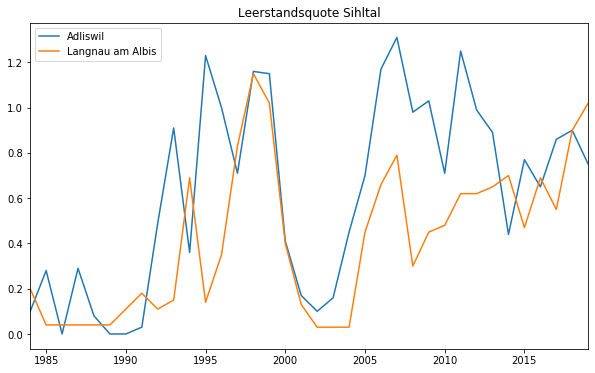

In [113]:
df_sihltal.plot(figsize=(10,6), title="Leerstandsquote Sihltal")

In [117]:
df_unterseelinks = pd.DataFrame({'Rüschlikon': df_rüschlikon, "Kilchberg": df_kilchberg, "Thalwil": df_thalwil})

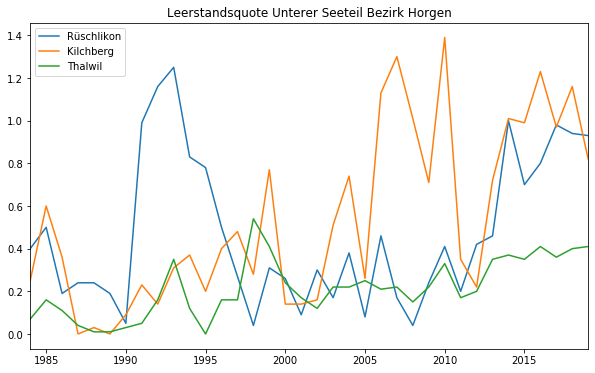

In [119]:
df_unterseelinks.plot(figsize=(10,6), title="Leerstandsquote Unterer Seeteil Bezirk Horgen")